### Part 1: Building a Feed-Forward Neural Network from Scratch 
- Using just NumPy

In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [2]:
import matplotlib.pyplot as plt

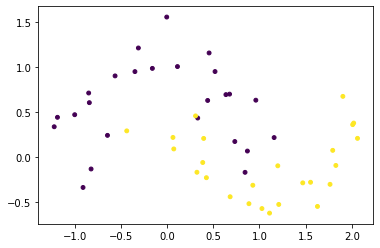

In [3]:
plt.scatter(X[:,0], X[:,1], s=15, c=y)

In [4]:
import numpy as np

In [5]:
#manually add a column for bias
X = np.hstack([X, np.ones((X.shape[0], 1 ))])

In [6]:
#let's model our neurons / activation functions as a sigmoid function

In [7]:
def sigmoid(x):
    """logistic function.
    
    takes in a single number, and squishes it
    between 0 and 1.
    """
    
    return 1 / (1 + np.exp(-x))
    
    

In [8]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])

assert np.all(sigmoid(a).round(2) == expected)

---

**the values of the arrows == weights == parameters**

In [9]:
hidden_weights = np.random.normal(loc=0.0, scale=1.0, size=(3, 2))   # 3 inputs feeding into 2 neurons
outer_weights = np.random.normal(loc=0.0, scale=1.0, size=(3, 1)) # 3 inputs feeding into 1 neuron

In [10]:
hidden_weights

array([[-0.01602472,  1.54707545],
       [ 0.28194476, -2.08507206],
       [-0.57345251,  0.60960852]])

In [11]:
outer_weights

array([[ 0.67330321],
       [ 0.03601204],
       [-0.7121668 ]])

---

In [12]:
weights = [hidden_weights, outer_weights]

In [23]:
weights

[array([[-0.01602472,  1.54707545],
        [ 0.28194476, -2.08507206],
        [-0.57345251,  0.60960852]]),
 array([[ 0.67330321],
        [ 0.03601204],
        [-0.7121668 ]])]

In [14]:
def feed_forward(X, weights):

    """
    1. Calculate the dot product of X
       and the weights of the first layer.
    """
    
    # (N, 3) * (3, 2) -> (N, 2)
    step1 = np.dot(X, weights[0])
    
    """
    2. Apply the sigmoid function on the result.
    """
    
    # (N, 2) -> (N, 2)
    step2 = sigmoid(step1)

    """
    3. Append an extra column of ones to the result (i.e. the bias).
    """
    #(N, 2) -> (N, 3)
    
    step3 = np.hstack([step2, np.ones((step2.shape[0], 1))])
    
    
    """
    4. Calculate the dot product of the previous step
       with the weights of the second (i.e. outer) layer.
    """
    # (N, 3) * (3, 1) -> (N, 1)
    step4 = np.dot(step3, weights[1])
    
    
    """
    5. Apply the sigmoid function on the result.
    """
    # (N, 1) -> (N, 1)
    step5 = sigmoid(step4)
    
    
    """
    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """
   

    return step2, step5

How a neural network "calculates":
1. Add bias
2. Multiply by weights
3. Activate

In [15]:
out1, out2 = feed_forward(X, weights)

In [16]:
weights

[array([[-0.01602472,  1.54707545],
        [ 0.28194476, -2.08507206],
        [-0.57345251,  0.60960852]]),
 array([[ 0.67330321],
        [ 0.03601204],
        [-0.7121668 ]])]

### Part 2: Training the Neural Network using Backpropagation

In [ ]:
loss=−(ytrue*log(ypred)+(1−ytrue)*log(1−ypred))

In [19]:
def log_loss(ytrue, ypred):
    loss = - (ytrue*np.log(ypred) + (1-ytrue)*np.log(1-ypred)) #transcribe the formula above
    return loss

In [20]:
ytrue = np.array([0.0, 0.0, 1.0, 1.0])
ypred = np.array([0.01, 0.99, 0.01, 0.99])
expected = np.array([0.01, 4.61, 4.61, 0.01])
assert np.all(log_loss(ytrue, ypred).round(2) == expected)

In [43]:
def backprop(weights,
             output1,
             output2,
             ytrue,
             X_input,
             LR_O,
             LR_H):
    #separate learning rates for outer and inner weights.

    wH = weights[0]
    wO = weights[1]

    '''EQUATION A:'''
    ytrue = ytrue.reshape(-1, 1)
    ypred = feed_forward(X_input, weights)
    error = (ytrue - ypred[0]) * log_loss(ytrue , ypred[0])

    '''EQUATION B:'''
    sig_deriv = sigmoid(np.dot(output2,wO.T)) * (1 - sigmoid(np.dot(output2,wO.T)))
    #derivative of the sigmoid function with respect to the
    #hidden output * weights
    y_grad = sig_deriv * error

    '''EQUATION C:'''
    hidden_out_with_bias = np.hstack([output2,np.ones((output2[0], 1))])
    #don't forget the bias!
    delta_wo = np.dot(-y_grad.transpose(), hidden_out_with_bias ) * LR_O

    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wo.transpose()

    '''EQUATION D:'''
    sig_deriv_2 = sigmoid(np.dot(output1, wH)) * (1 - sigmoid(output1, wH))
    H_grad = sig_deriv_2  * np.dot(y_grad , wH) #weights[:2].transpose()
    #exclude the bias (3rd column) of the outer weights,
    #since it is not backpropagated!

    '''EQUATION E:'''
    delta_wH = np.dot(-H_grad.transpose(), X_input) * LR_H
    wH_new = wH + delta_wH.transpose()
    #old weights + delta weights -> new weights!

    return w0_new, wH_new

In [44]:
LOSS_VEC = []

for i in range(500):
    
    out1, out2 = feed_forward(X, weights)
    LOSS_VEC.append(sum(log_loss(y,out2))[0])
    w0_new, wH_new = backprop(weights, out1, out2, y, X, 0.1, 0.1)
    weights = [w0_new, wH_new]

ValueError: operands could not be broadcast together with shapes (50,3) (50,2) 

In [28]:
ypred = feed_forward(X, weights)
ypred[0]

array([[0.42720827, 0.15589385],
       [0.31724072, 0.97395163],
       [0.37254195, 0.68792381],
       [0.35870313, 0.96179949],
       [0.41113932, 0.10110644],
       [0.39799855, 0.89532113],
       [0.3660902 , 0.6302945 ],
       [0.38122242, 0.33813483],
       [0.34418404, 0.85129389],
       [0.37870332, 0.29102347],
       [0.42754395, 0.21224532],
       [0.39874346, 0.68533524],
       [0.33680614, 0.97002232],
       [0.42214605, 0.36180972],
       [0.36902642, 0.79948734],
       [0.38782152, 0.55448099],
       [0.31998148, 0.98618936],
       [0.37772423, 0.95002812],
       [0.37660872, 0.95095164],
       [0.42304657, 0.10532345],
       [0.40439508, 0.54945964],
       [0.44350303, 0.08350188],
       [0.34211786, 0.4766624 ],
       [0.32993541, 0.92978698],
       [0.35513825, 0.79122712],
       [0.34647621, 0.90613659],
       [0.33474095, 0.98141993],
       [0.37451937, 0.56299007],
       [0.3206235 , 0.96734846],
       [0.40417078, 0.53715806],
       [0.